                                             Dates Fruit Dataset 


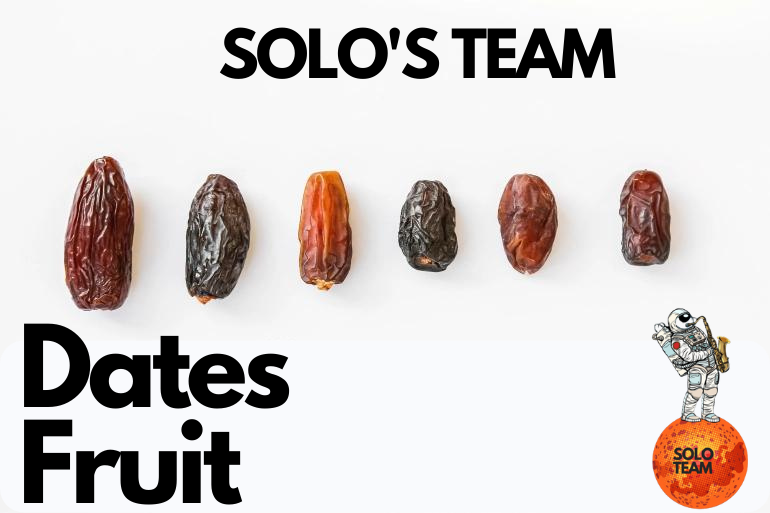

# Set up 

## Libraries Importing

In [1]:
#set up & Import 
import numpy as np # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting
from matplotlib import style 
style.use('fivethirtyeight')
from mpl_toolkits.mplot3d import Axes3D
import requests # url 
from IPython.display import HTML # HTML enable


import sklearn # scikit-learn kutubxonasi
import seaborn as sns # statistical graphics
import plotly.express as px #plotting

                   ### For ML SKLearn ###
# for Regression: 
from sklearn.linear_model import LinearRegression #for simple linear regression
from sklearn.preprocessing import PolynomialFeatures #for polynomial regression
from sklearn.model_selection import train_test_split #to split the dataset for ML
from sklearn.metrics import mean_absolute_error #cost function MAE 
from sklearn.metrics import mean_squared_error #cost function MSE
from sklearn.metrics import r2_score #cost function R2 Score 
from sklearn.model_selection import cross_val_score #cross value score 
from sklearn.model_selection import GridSearchCV #grid search CV 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

 # for Classifications:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay

## Dataset

In [2]:
# step 1 importing the dataset  
dataset = 'Date_Fruit_Datasets.xlsx' 
Dates = pd.read_excel(dataset)

In [3]:
Dates.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


In [1]:
# counting 
def num(): 
    nRow, nCol = Dates.shape
print(f'There are {nRow} rows and {nCol} columns')

NameError: name 'nRow' is not defined

In [2]:
Dates.shape

NameError: name 'Dates' is not defined

In [ ]:
Dates['Class'].unique()

In [ ]:
Dates['Class'].value_counts()

## Preprocessing

In [ ]:
Dates.info()

In [3]:
Dates.isnull().sum()

AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
MeanRR           0
MeanRG           0
MeanRB           0
StdDevRR         0
StdDevRG         0
StdDevRB         0
SkewRR           0
SkewRG           0
SkewRB           0
KurtosisRR       0
KurtosisRG       0
KurtosisRB       0
EntropyRR        0
EntropyRG        0
EntropyRB        0
ALLdaub4RR       0
ALLdaub4RG       0
ALLdaub4RB       0
Class            0
dtype: int64

### Columns droping 

In [7]:
#we drop all other except for dimension columns and class since we are not intrestes in it 
#and to minmize the load for processing 
Dates1 = Dates.drop(Dates.iloc[:,12:34], axis=1)

In [8]:
Dates1.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,0.9374,0.8750,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,0.9773,0.9065,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,0.9446,0.8706,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,0.9458,0.8791,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,0.9358,0.8707,BERHI


In [9]:
Dates1.shape

(898, 13)

In [10]:
Dates1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AREA          898 non-null    int64  
 1   PERIMETER     898 non-null    float64
 2   MAJOR_AXIS    898 non-null    float64
 3   MINOR_AXIS    898 non-null    float64
 4   ECCENTRICITY  898 non-null    float64
 5   EQDIASQ       898 non-null    float64
 6   SOLIDITY      898 non-null    float64
 7   CONVEX_AREA   898 non-null    int64  
 8   EXTENT        898 non-null    float64
 9   ASPECT_RATIO  898 non-null    float64
 10  ROUNDNESS     898 non-null    float64
 11  COMPACTNESS   898 non-null    float64
 12  Class         898 non-null    object 
dtypes: float64(10), int64(2), object(1)
memory usage: 91.3+ KB


### Replacing

In [11]:
# wrong naming based on the original paper
# src: https://www.hindawi.com/journals/mpe/2021/4793293/tab2/
Dates1['Class'].replace(['BERHI', 'DEGLET', 'DOKOL', 'IRAQI', 'ROTANA', 'SAFAVI', 'SOGAY'],
                        ['BERHI', 'DEGLET', 'SUKARY', 'IRAQI', 'RUTHANA', 'SAFAWI', 'SOGAY'], inplace=True)
# changes: DOKOL, ROTANA, SAFAVI

In [12]:
# Arabic dictionary explains and translate 
ArClass = { 
'BERHI': 'برحي',
'DEGLET': 'دقلة نور',
'DOKOL': 'سكري', 
'IRAQI': 'رطب مضافتي العراقي', 
'ROTANA': 'روثانة',
'SAFAVI': 'صفاوي', 
'SOGAY': 'صقعي'
}

In [13]:
# check and verifey
Dates1['Class'].unique()

array(['BERHI', 'DEGLET', 'SUKARY', 'IRAQI', 'RUTHANA', 'SAFAWI', 'SOGAY'],
      dtype=object)

In [14]:
Dates1['Class'].value_counts()

SUKARY     204
SAFAWI     199
RUTHANA    166
DEGLET      98
SOGAY       94
IRAQI       72
BERHI       65
Name: Class, dtype: int64

In [15]:
Dates1.describe(exclude='number')

,Class
count,898
unique,7
top,SUKARY
freq,204


In [16]:
Dates.describe(exclude='number')

,Class
count,898
unique,7
top,DOKOL
freq,204


## EDA

In [ ]:
Dates1.shape

In [ ]:
Dates1.describe()

In [ ]:
Dates1.info()

In [ ]:
sns.pairplot(Dates1,hue='Class')

### Visualizations

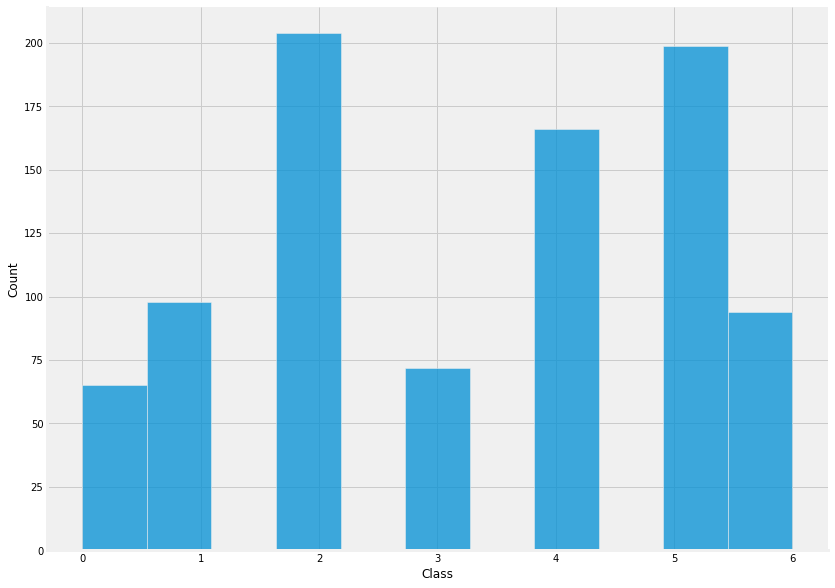

In [24]:
sns.displot(Dates['Class'], hue=None,  hue_order='Class', height=8.27, aspect=11.7/8.27)

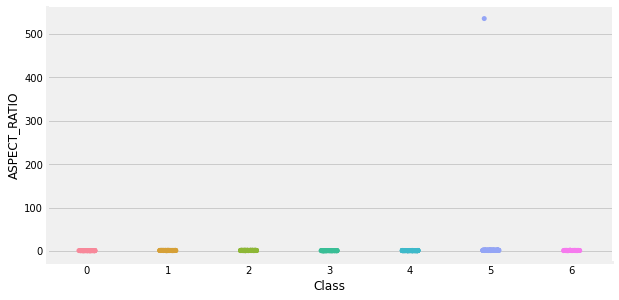

In [23]:
sns.catplot(data=Dates, x='Class', y='ASPECT_RATIO', 
    hue='Class', height=4.27, aspect=8.7/4.27)

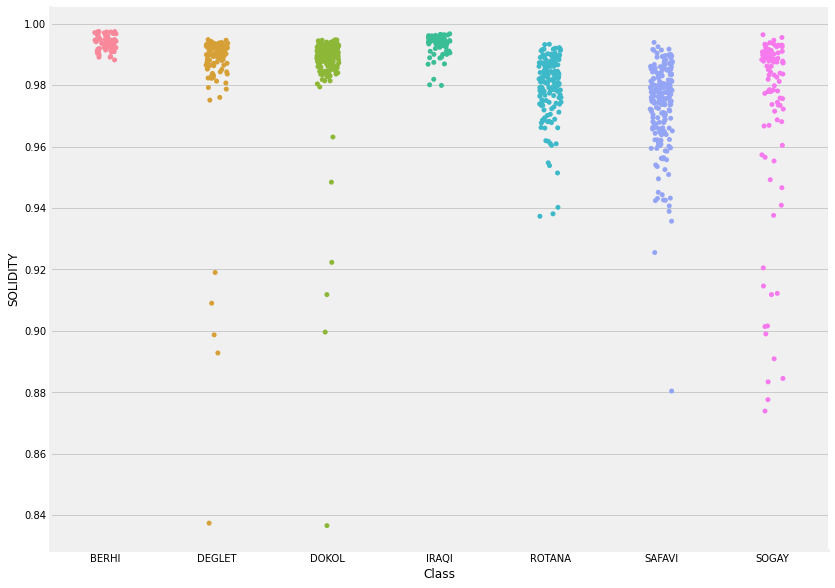

In [22]:
sns.catplot(data=Dates1, x='Class', y='SOLIDITY', 
    hue='Class', height=8.27, aspect=11.7/8.27)

C:\Users\Omars\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of \nDate Fruits')

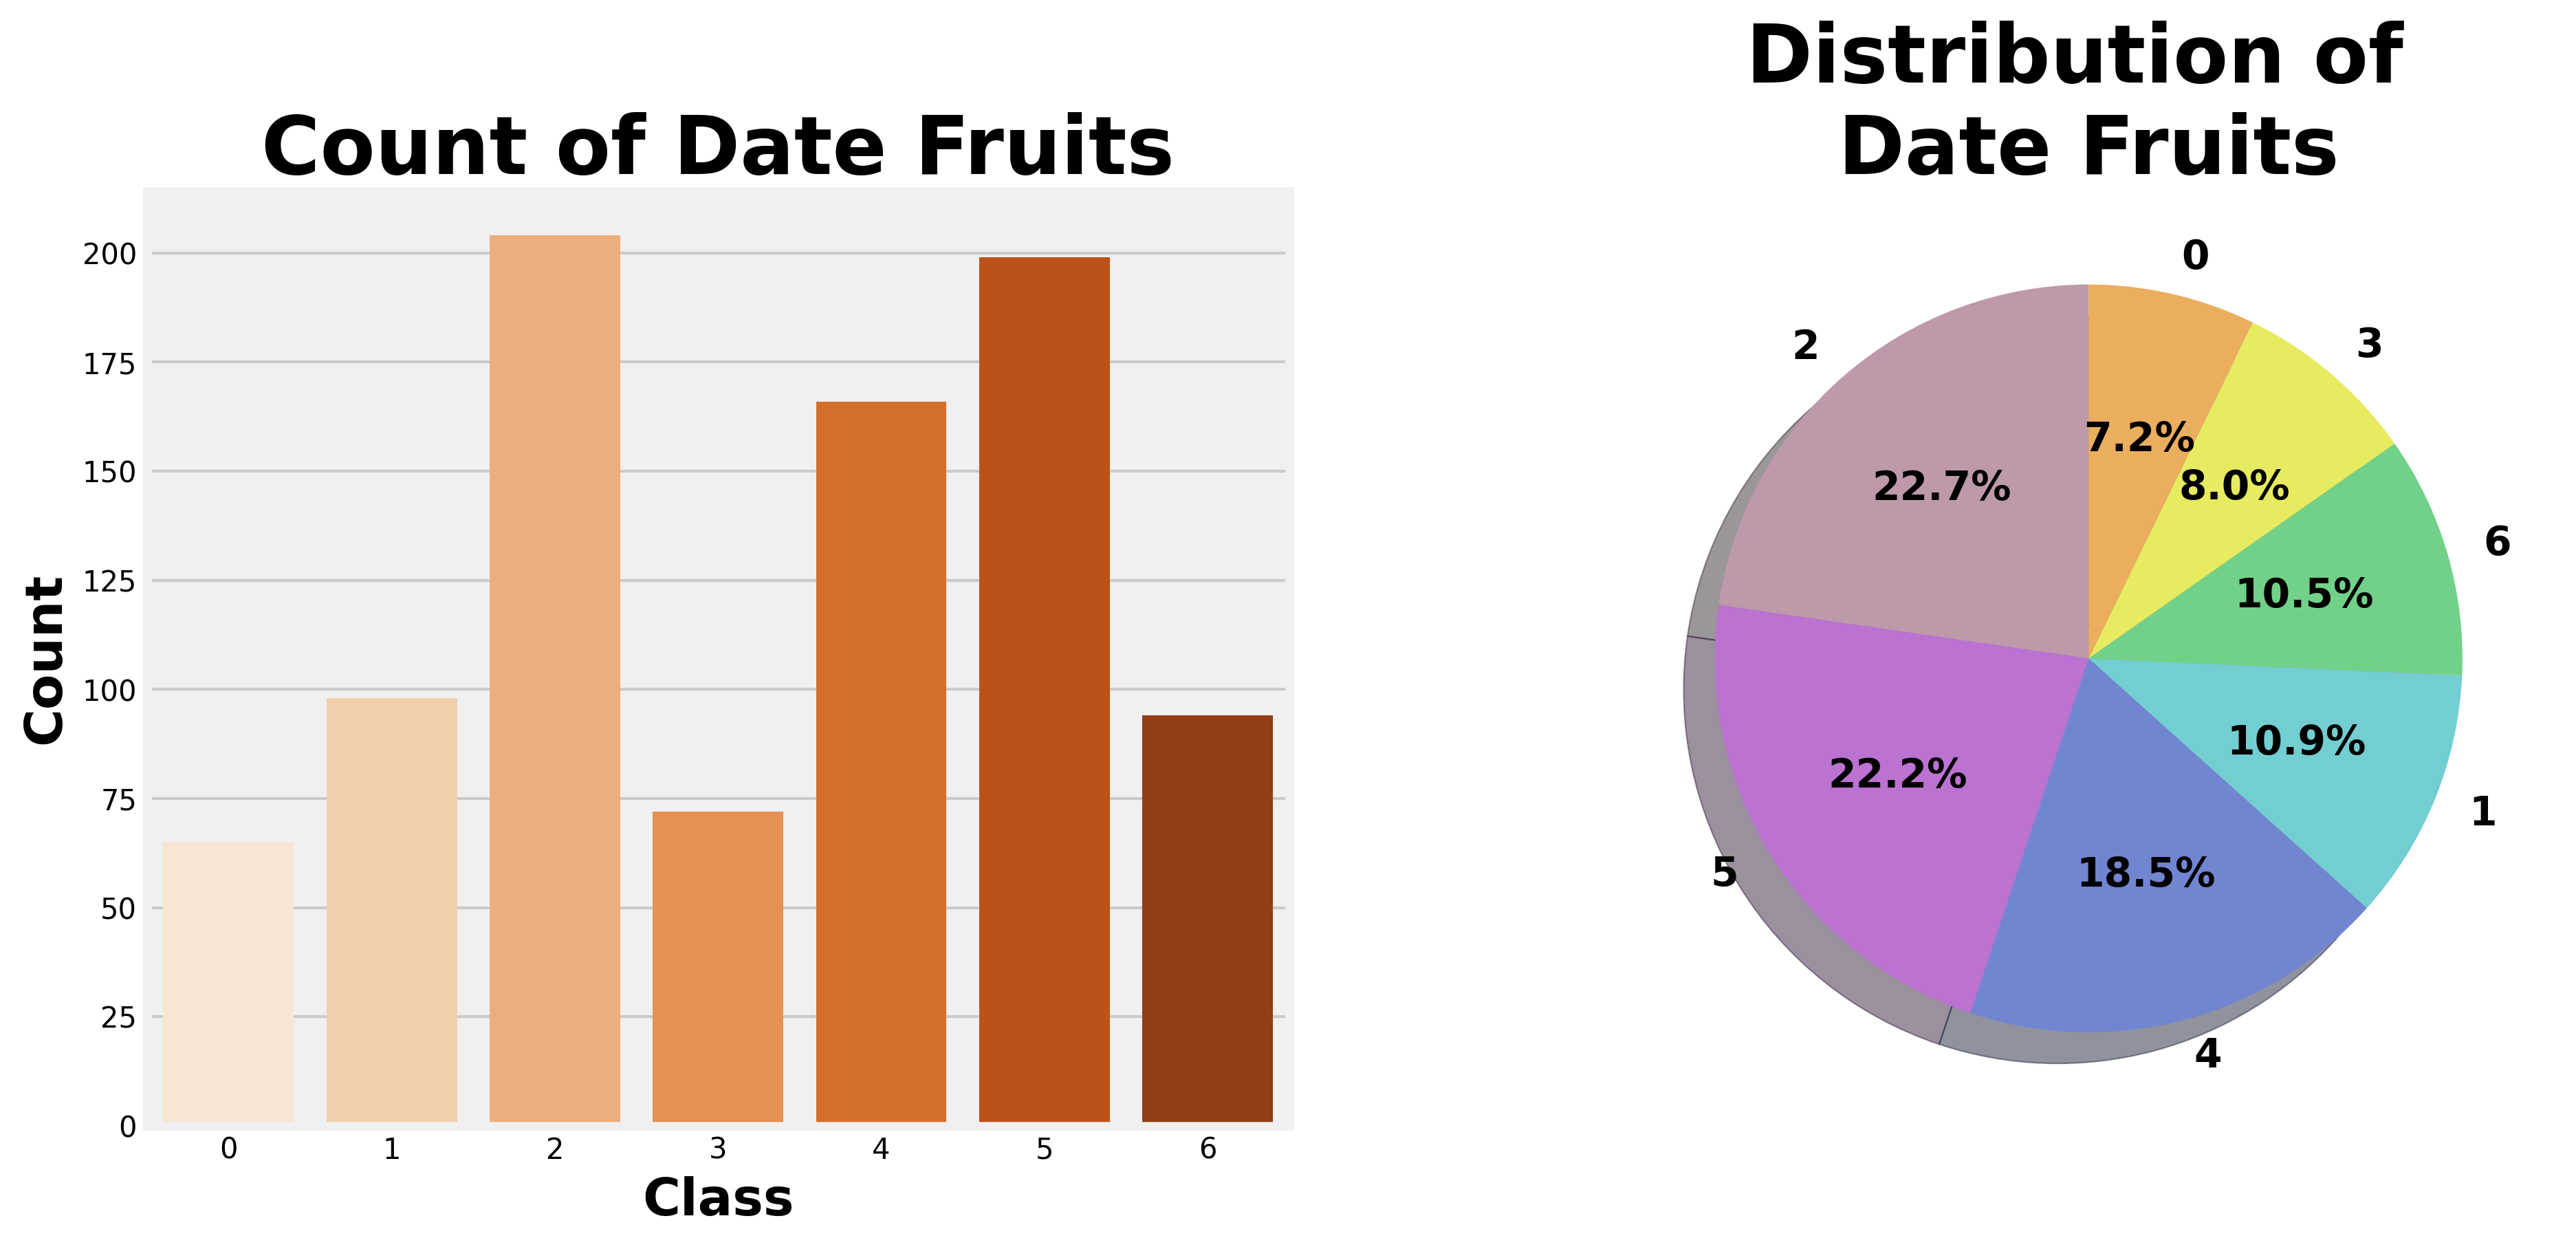

In [21]:
type_dict= Dates["Class"].value_counts().to_dict()
type_label = type_dict.keys()
type_value = type_dict.values()
colors = ["#BD99AA", "#BB72D1", "#7285D1", "#72CED1", "#72D188", "#E6EB5F", "#EBAE5F"]
explode = (0, 0, 0, 0, 0, 0, 0)
fig, ax = plt.subplots(1,2, figsize=(14,6), dpi=300)
sns.countplot(Dates["Class"], palette="Oranges", ax=ax[0])
ax[0].set_title("Count of Date Fruits", size=28, fontweight="bold")
ax[0].set_xlabel("Class", size=18, fontweight="bold")
ax[0].set_ylabel("Count", size=18, fontweight="bold")
plt.pie(type_value, explode=explode, labels=type_label, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 14, "fontweight" : "bold"}, colors=colors)
plt.title("Distribution of \nDate Fruits", size=28, fontweight="bold")

In [25]:
grouped=Dates.groupby(by='Class').mean()
grouped

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
Class,,,,,,,,,,,,,,,,,,,,,
0,405213.446154,2321.504669,815.370329,634.656000,0.621369,716.904234,0.993957,407666.153846,0.766549,1.288515,...,1.237302,3.805326,5.732585,6.671926,-4.139439e+10,-3.796279e+10,-3.325089e+10,49.352677,48.263368,44.324366
1,233743.357143,1831.441983,680.222427,440.273151,0.756589,543.476547,0.984319,237428.908163,0.760827,1.550036,...,-0.222301,2.644296,2.642760,2.742700,-3.555533e+10,-3.061273e+10,-2.876142e+10,59.580324,55.605459,54.638908
2,145147.421569,1436.321190,537.843773,342.949578,0.763276,427.546873,0.987206,147026.990196,0.755143,1.565859,...,-0.142743,3.070927,3.051433,2.751065,-2.370817e+10,-2.213381e+10,-1.897899e+10,61.817167,60.260382,56.393073
3,433983.583333,2411.046333,836.104518,664.326222,0.595040,742.701772,0.993076,436990.513889,0.763890,1.261814,...,1.072739,5.975487,7.677246,6.215456,-2.909566e+10,-3.064288e+10,-3.057680e+10,40.237440,41.758233,41.056210
4,387115.867470,2376.310050,832.475543,599.880924,0.686942,701.009730,0.980255,394846.084337,0.736674,1.391999,...,-0.172949,2.763720,2.769380,2.903195,-6.212994e+10,-5.455981e+10,-5.089050e+10,61.717520,58.280622,56.329015
5,334367.783920,2329.186030,881.385573,488.488877,0.826394,650.104639,0.973426,343399.924623,0.686883,4.483646,...,0.626492,7.819265,10.384683,4.684819,-9.085305e+09,-1.099945e+10,-1.459300e+10,25.676704,29.007776,33.765713
6,286872.957447,2051.277354,755.978483,492.676919,0.751864,602.329610,0.971239,295203.734043,0.731430,1.536905,...,0.236660,2.516620,2.728207,2.871002,-3.588859e+10,-2.791138e+10,-2.645158e+10,53.883697,47.810700,47.089709


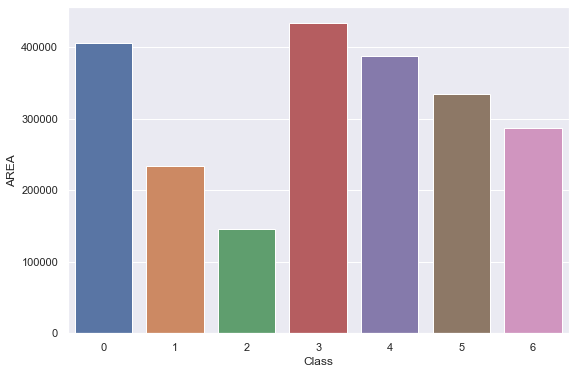

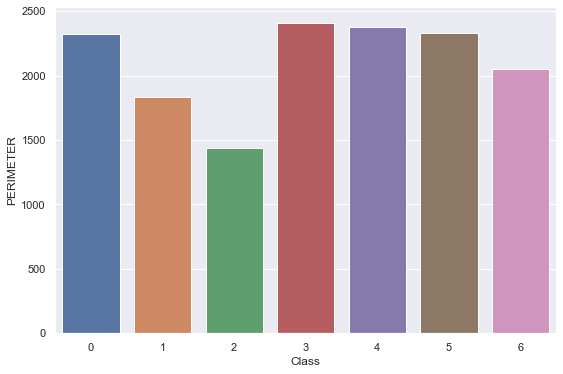

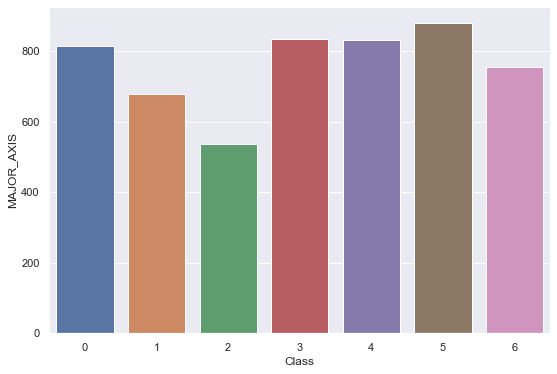

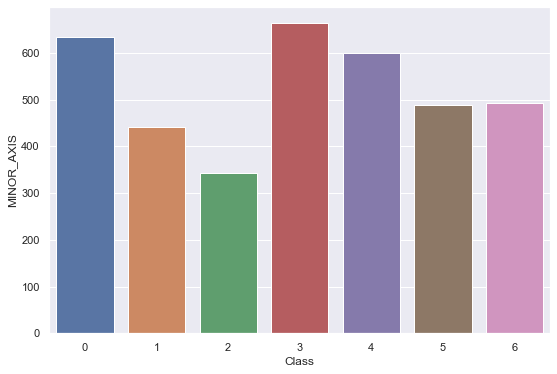

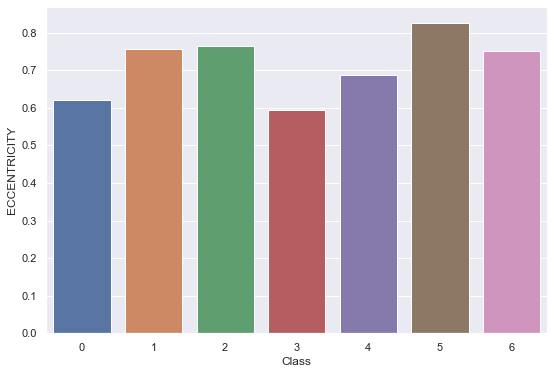

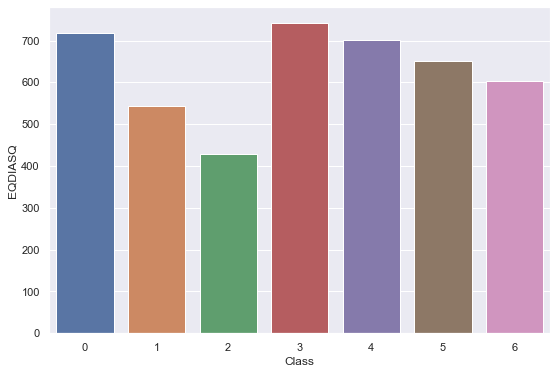

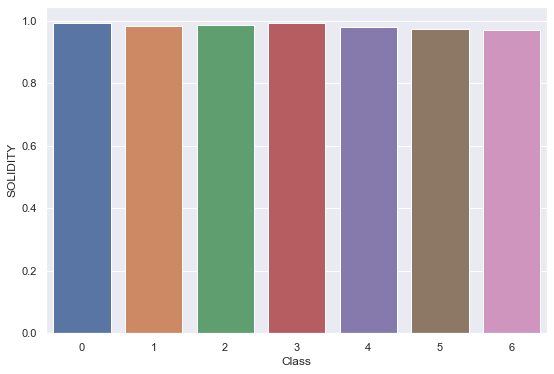

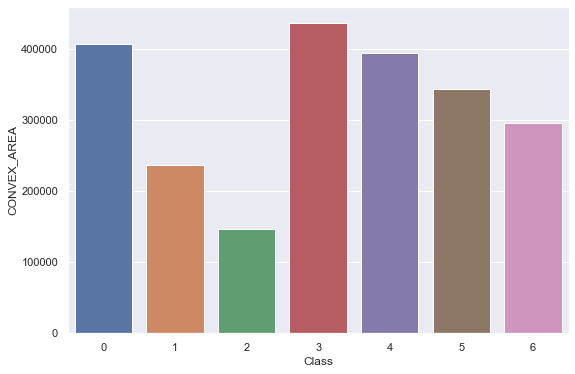

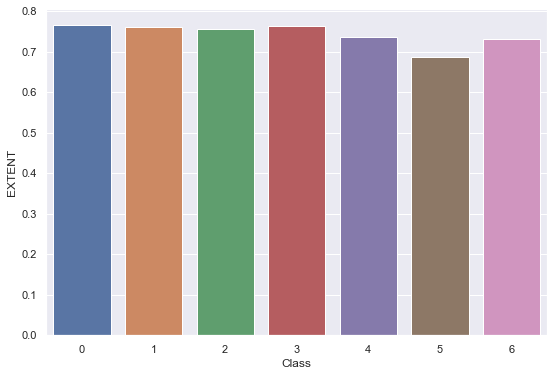

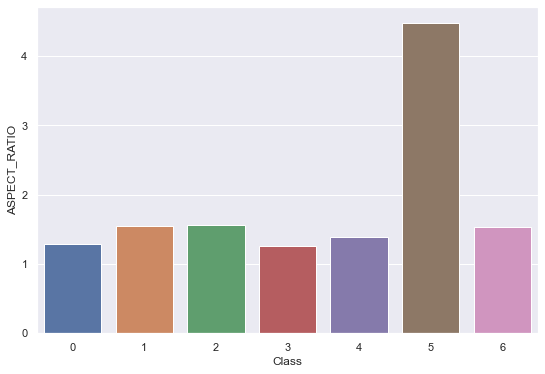

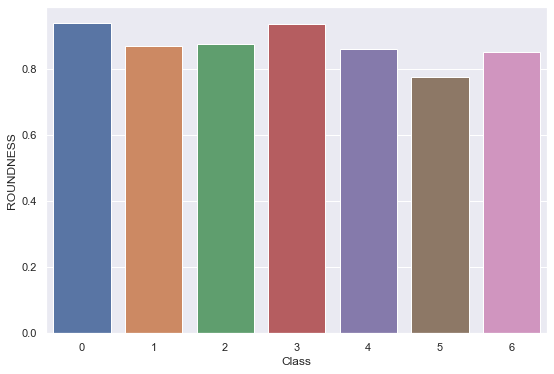

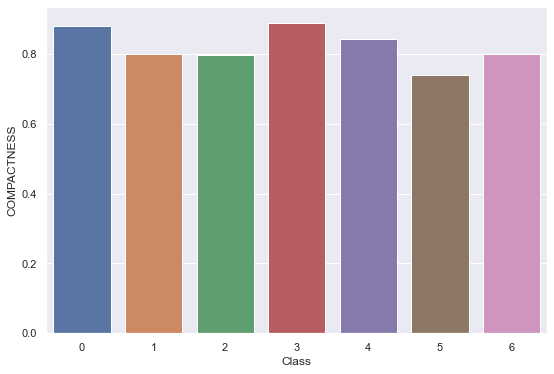

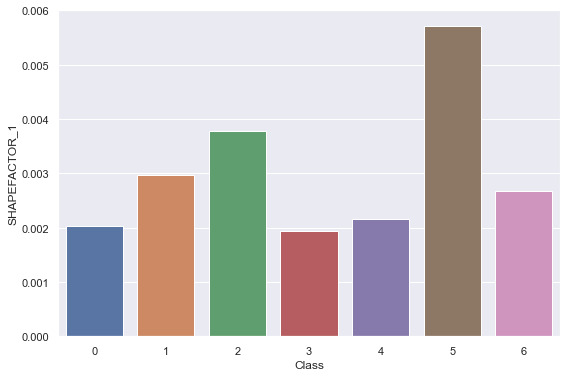

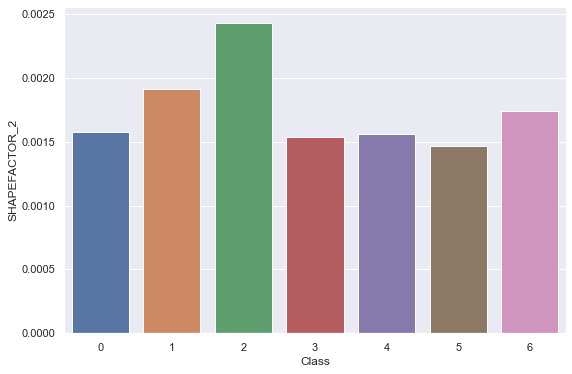

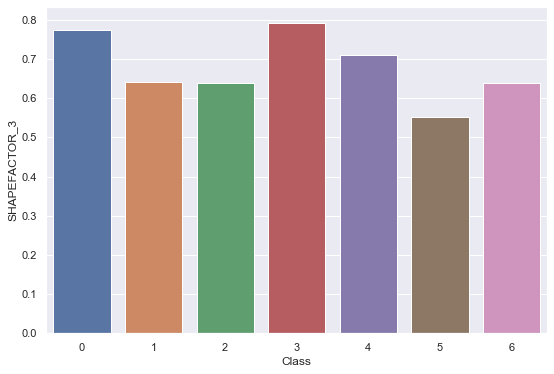

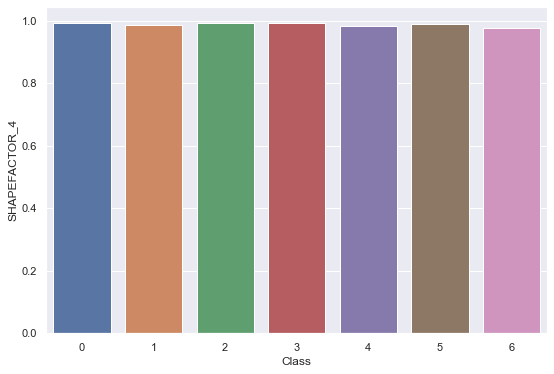

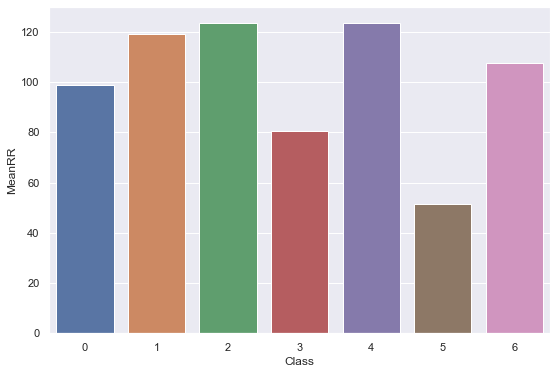

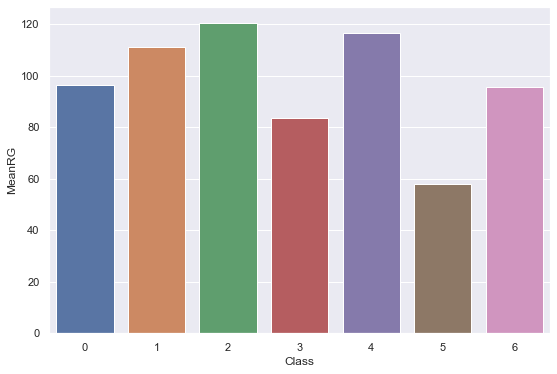

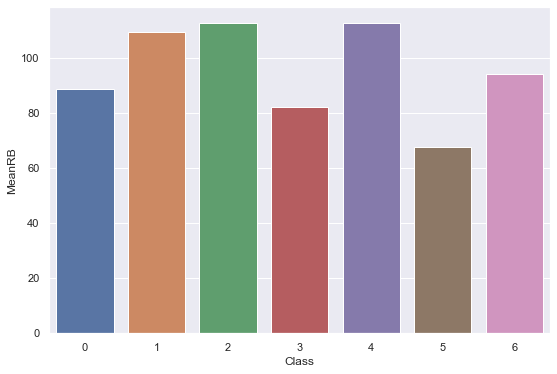

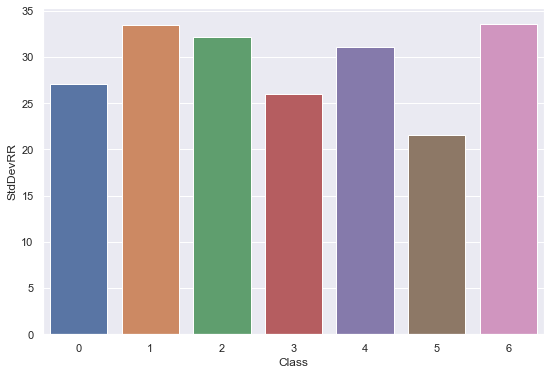

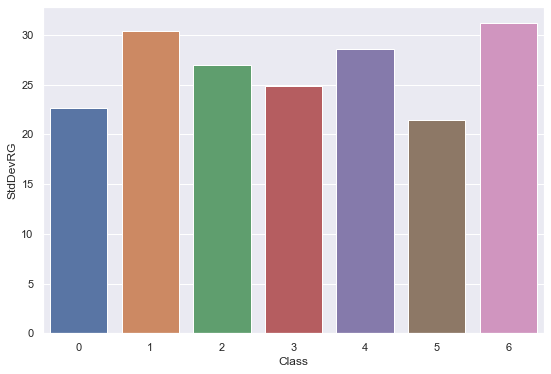

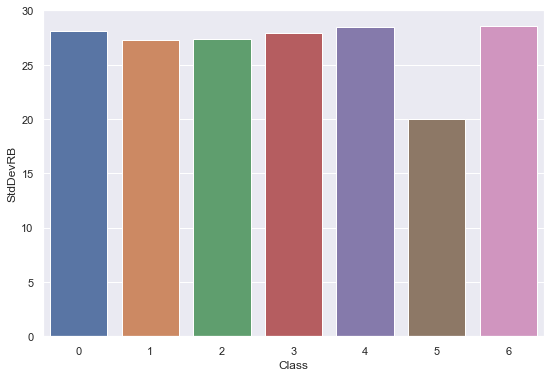

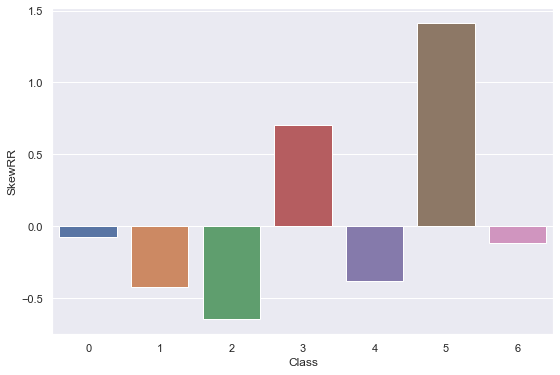

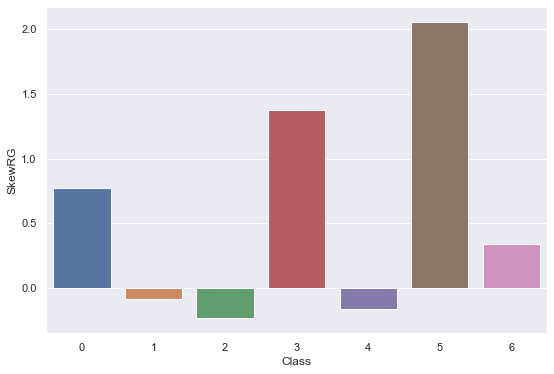

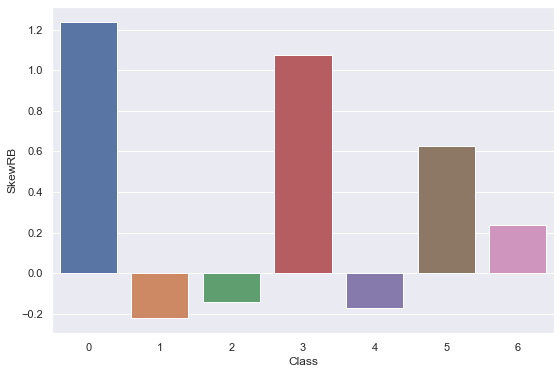

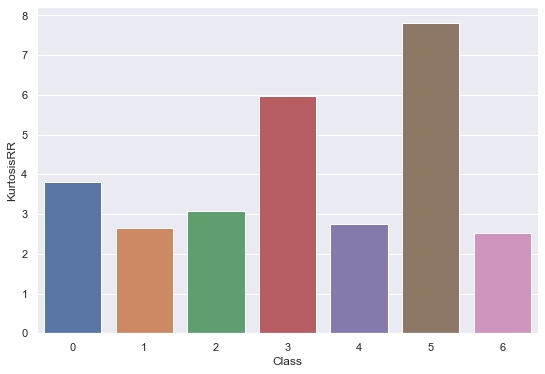

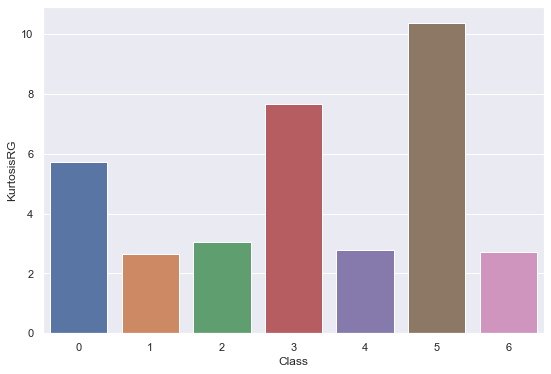

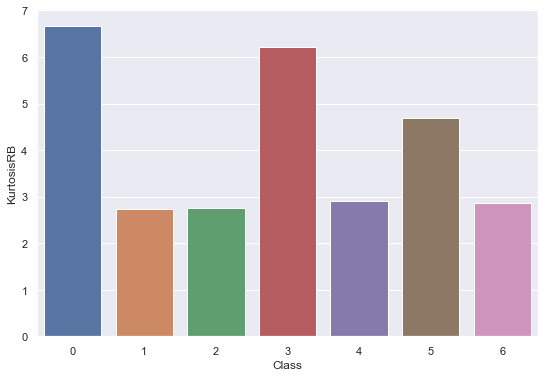

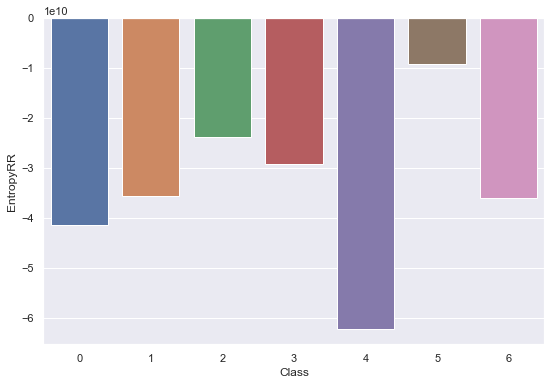

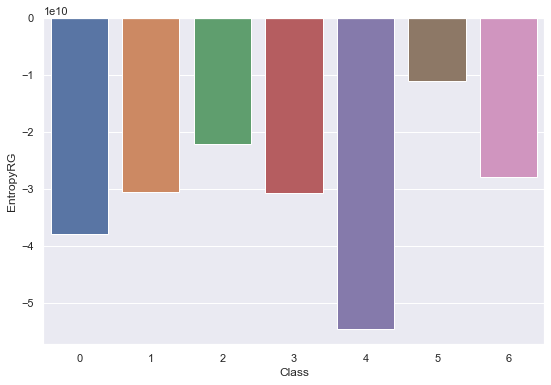

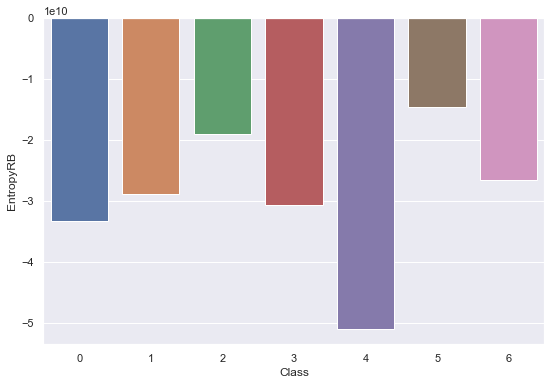

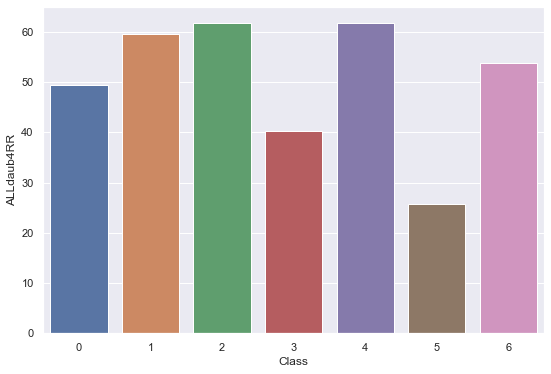

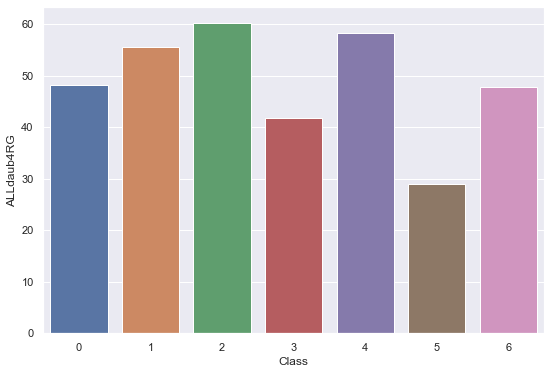

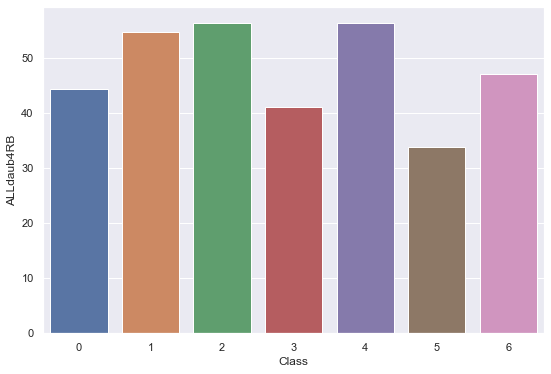

In [27]:
%matplotlib inline
sns.set()
for i in grouped.columns:
    plt.figure(figsize=(8,6))
    sns.barplot(data=grouped,x=grouped.index,y=grouped[i])
    plt.show()

# ML

## Preperation

In [17]:
#splitting the data to train, test and validation
# Split the data
train, test = train_test_split(
    Dates1, 
    train_size = 0.8,
    test_size = 0.2,
    random_state=15
)

train, val = train_test_split(
    train,
    train_size = 0.8,
    test_size = 0.2,
    random_state=15
)

In [18]:
train.shape

(574, 13)

In [19]:
test.shape

(180, 13)

In [20]:
val.shape

(144, 13)

In [ ]:
train.dtypes

## Regrission

###  Multiple linear regression

In [ ]:
def cleaner(df):
    
    "Return Only Numeric Features"
    
    # Create boolean array with only columns that are float64
    columns_bool = (df.dtypes != "category").values & (df.dtypes != "object").values 

    # Return only numeric columns
    df = df.iloc[:, columns_bool].dropna()

    return df

# applying the function on both the training and validation sets
train_numeric = cleaner(train)
val_numeric = cleaner(val)

In [ ]:
# Calculates the cost functions
def calc_cost(y_true, y_predict):
    
    "Calculate Cost Functions and print output"
    
    mse = mean_squared_error(y_true, y_predict)
    mae = mean_absolute_error(y_true, y_predict)
    rmse = mean_squared_error(y_true, y_predict, squared=False)
    
    # Round the numbers for readability --> decimal points are not important
    ls = [round(mse), round(mae), round(rmse)]
    
    return ls

In [ ]:
#We want to set each numric column as a target at one time and return the result
MLTraining={}
for i in train_numeric.columns:
    # Create X, y train and validation sets
    target = i
    
    # feature set --> everything except for i --> X_train
    # target set/column --> i --> y_train
    X_train = train_numeric.drop(target, axis=1)
    y_train = train_numeric[target]
    
    X_val = val_numeric.drop(target, axis=1)
    y_val = val_numeric[target]
    
    #We are going to calculate three regression models: 1-simple 2-feature scaled 3-robust scaled
    
    #1 Create a model object
    lr1 = LinearRegression()
    # Train simple model
    lr1.fit(X_train, y_train)
    
    #2 Here we make a standarad scaler object as a second linear regression model prediction
    scaler = StandardScaler()
    # Apply to X data --> only numeric columns 
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    lr2 = LinearRegression()
    lr2.fit(X_val_scaled, y_val)
    
    #3 Train robust scaled model 
    scaler2 = RobustScaler()
    # Apply to X data
    X_train_robust = scaler2.fit_transform(X_train)
    X_val_robust = scaler2.transform(X_val)
    # Train the model
    lr3 = LinearRegression()
    lr3.fit(X_train_robust, y_train)
    
    #Interception for all models
    interc1 = lr1.intercept_
    interc2 = lr2.intercept_
    interc3 = lr3.intercept_
    
    #coeffecients for all models
    coef1 = lr1.coef_
    coef2 = lr2.coef_
    coef3 = lr3.coef_
    
    # Now for the results 
    #R2 score
    lr1.score(X_val, y_val)
    lr2.score(X_val_scaled, y_val)
    lr3.score(X_val_robust, y_val)
    # To compare the results we create also a baseline model --> replace values by the mean and calculate the cost functions
    b_preds = [y_train.mean() for x in range(len(y_train))]
    res0 = calc_cost(y_train, b_preds)
    
    #here we calculate the cost function for the first linear regression 
    res1 = calc_cost(y_train, lr1.predict(X_train))
    res2 = calc_cost(y_val, lr2.predict(X_val_scaled))
    res3 = calc_cost(y_val, lr3.predict(X_val_robust))
    
    MLTraining[target] = (interc1,coef1,interc2,coef2,interc3,coef3,res0,res1,res2,res3)

In [ ]:
ResultDF = pd.DataFrame.from_dict(MLTraining)
ResultDF.index = ['Intercept1','Coeffecient1','Intercept2','Coeffecient2','Intercept3','Coeffecient3',
                 'Baseline:MSE,MAE,RMSE','Standard:MSE,MAE,RMSE','Scaler:MSE,MAE,RMSE','RobustScaler:MSE,MAE,RMSE']
ResultDF

### Final Result

We observed that for columns (ECCENTRICITY, SOLIDITY, EXTENT, ROUNDNESS, COMPACTNESS) 
there is no diffrence between the baseline and the three models so there is no need to
use ML to reach predections.

For the rest of columns The best model is:
    
    1-AREA: Standard, 2-PERIMETER: Scaler, 3-MAJOR_AXIS:Standard=Scaler,
    
    4-MINOR_AXIS:Scaler, 5-EQDIASQ:Scaler, 6-CONVEX_AREA: Standard,
    
    7-ASPECT_RATIO:Scaler

## Classification

### Correlation

In [21]:
# Weak Correlation --> below 0.5 
# Correlation --> 0.5 - 0.7
# Strong Correlation --> more than 0.7

corr = Dates1.corr()

corr.style.background_gradient(cmap='coolwarm')

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS
AREA,1.000000,0.956494,0.878893,0.954899,-0.370303,0.993243,0.027371,0.998886,-0.086286,-0.095342,0.044346,0.315197
PERIMETER,0.956494,1.000000,0.960734,0.859990,-0.166816,0.959938,-0.133857,0.963489,-0.214632,0.018308,-0.235744,0.078554
MAJOR_AXIS,0.878893,0.960734,1.000000,0.721133,0.063090,0.886277,-0.166982,0.886948,-0.279951,0.111631,-0.355258,-0.164403
MINOR_AXIS,0.954899,0.859990,0.721133,1.000000,-0.607120,0.948006,0.059613,0.951470,0.028003,-0.150407,0.243655,0.551966
ECCENTRICITY,-0.370303,-0.166816,0.063090,-0.607120,1.000000,-0.335085,-0.220434,-0.356565,-0.342775,0.110238,-0.659626,-0.917470
EQDIASQ,0.993243,0.959938,0.886277,0.948006,-0.335085,1.000000,0.018777,0.993397,-0.112353,-0.157370,0.035564,0.301535
SOLIDITY,0.027371,-0.133857,-0.166982,0.059613,-0.220434,0.018777,1.000000,-0.016449,0.392552,-0.189234,0.611010,0.384826
CONVEX_AREA,0.998886,0.963489,0.886948,0.951470,-0.356565,0.993397,-0.016449,1.000000,-0.107403,-0.095457,0.015083,0.297794
EXTENT,-0.086286,-0.214632,-0.279951,0.028003,-0.342775,-0.112353,0.392552,-0.107403,1.000000,0.067207,0.470357,0.365187
ASPECT_RATIO,-0.095342,0.018308,0.111631,-0.150407,0.110238,-0.157370,-0.189234,-0.095457,0.067207,1.000000,-0.410407,-0.422474


In [22]:
Dates1.value_counts()

# Baseline --> is Zero --> would be accurate by 257/400 = 64%
# Whenever I build a model it needs to be more accurate than 64% 

AREA    PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY  EQDIASQ   SOLIDITY  CONVEX_AREA  EXTENT  ASPECT_RATIO  ROUNDNESS  COMPACTNESS  Class  
1987    2289.3059  1222.7230   2.2832      1.0000        50.2984   0.8804    2257         0.8528  535.5257      0.0048     0.0411       SAFAWI     1
382630  2509.5149  999.2378    491.9224    0.8704        697.9825  0.9644    396751       0.7346  2.0313        0.7635     0.6985       SAFAWI     1
359018  2276.5271  819.6603    571.9311    0.7163        676.1035  0.9819    365618       0.7587  1.4331        0.8705     0.8249       RUTHANA    1
359037  2249.9441  783.8896    614.4819    0.6209        676.1214  0.9604    373845       0.7648  1.2757        0.8913     0.8625       RUTHANA    1
359297  2564.9961  931.9860    495.4669    0.8470        676.3661  0.9623    373376       0.6038  1.8810        0.6863     0.7257       SAFAWI     1
                                                                                                               

In [24]:
Dates2 = Dates1

In [25]:
# convert class to numericals 
Dates2['Class'].replace(['BERHI', 'DEGLET', 'DOKOL', 'IRAQI', 'ROTANA', 'SAFAVI', 'SOGAY'],
                        [0, 1, 2, 3, 4, 5, 6], inplace=True)

In [26]:
Dates2['Class']

0      0
1      0
2      0
3      0
4      0
      ..
893    6
894    6
895    6
896    6
897    6
Name: Class, Length: 898, dtype: object

### Splitting the dataset

In [27]:

# feature set and the target for both the training and the testing 
X = Dates2.iloc[:,:-1]
y = Dates2.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=100)

### Classification Models

#### Decision Tree Classifier Model

In [30]:
DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='entropy',max_depth=7,random_state=33)
DecisionTreeClassifierModel.fit(X_train, y_train)

print('DecisionTreeClassifierModel Train Score is : ' , DecisionTreeClassifierModel.score(X_train, y_train))
print('DecisionTreeClassifierModel Test Score is : ' , DecisionTreeClassifierModel.score(X_test, y_test))

ValueError: Unknown label type: 'unknown'

#### Random Forest Classifier Model

In [29]:
RandomForestClassifierModel = RandomForestClassifier(criterion = 'entropy', max_depth=5, n_estimators=300, random_state=44)
RandomForestClassifierModel.fit(X_train, y_train)

print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(X_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(X_test, y_test))

ValueError: Unknown label type: 'unknown'

#### Gradient Boosting Classifier Model

In [ ]:
GBCModel = GradientBoostingClassifier(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=44)
GBCModel.fit(X_train, y_train)
print('GBCModel Train Score is : ' , GBCModel.score(X_train, y_train))
print('GBCModel Test Score is : ' , GBCModel.score(X_test, y_test))

#### Voting Classifier Model

In [ ]:
VotingClassifierModel = VotingClassifier(estimators=[('GBCModel',GBCModel),
                                                     ('RFCModel',RandomForestClassifierModel),
                                                     ('TDCModel',DecisionTreeClassifierModel)],
                                         voting='soft')
VotingClassifierModel.fit(X_train, y_train)
print('VotingClassifierModel Train Score is : ' , VotingClassifierModel.score(X_train, y_train))
print('VotingClassifierModel Test Score is : ' , VotingClassifierModel.score(X_test, y_test))